Processing Liver...


/tmp/ipykernel_6868/549117026.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


<Figure size 640x480 with 0 Axes>

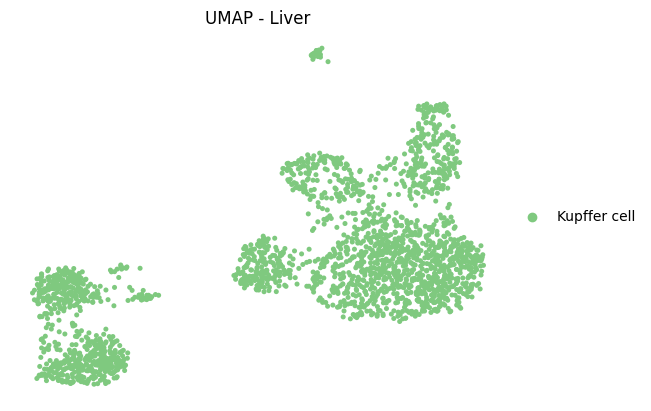

<Figure size 1000x600 with 0 Axes>

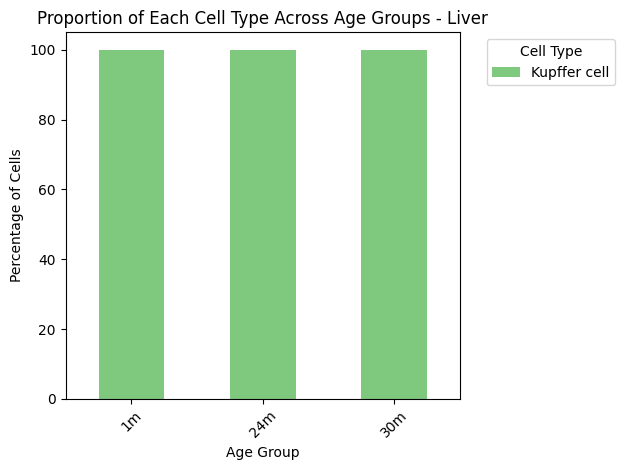

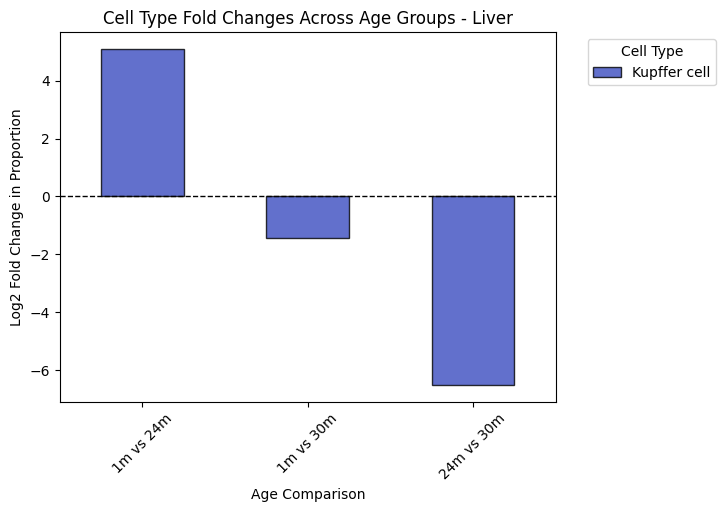

Analysis completed for Liver. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures

Processing Marrow...


/tmp/ipykernel_6868/549117026.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

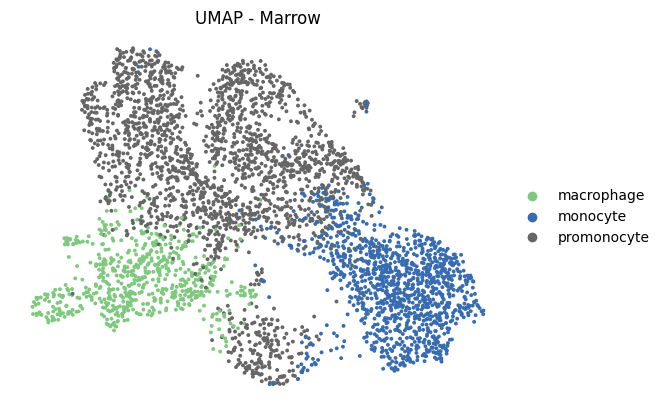

<Figure size 1000x600 with 0 Axes>

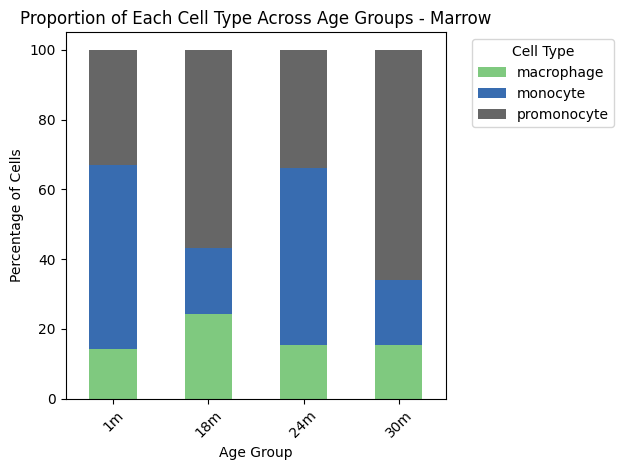

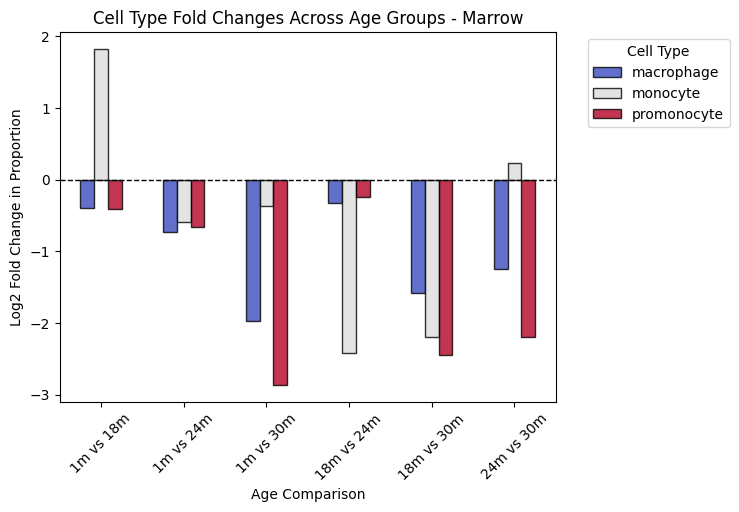

Analysis completed for Marrow. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures

Processing Trachea...


/tmp/ipykernel_6868/549117026.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Trachea. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures

Processing Large_Intestine...
Skipping Large_Intestine as no selected cell types are present.

Processing Limb_Muscle...


/tmp/ipykernel_6868/549117026.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

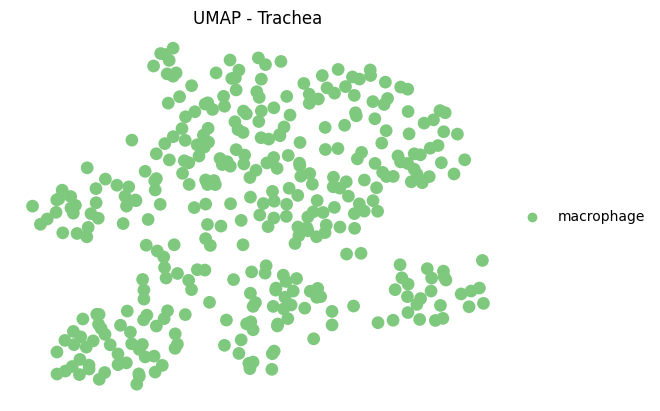

<Figure size 1000x600 with 0 Axes>

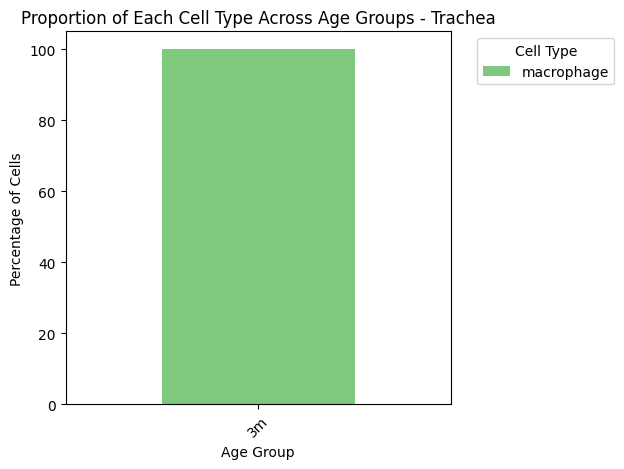

<Figure size 640x480 with 0 Axes>

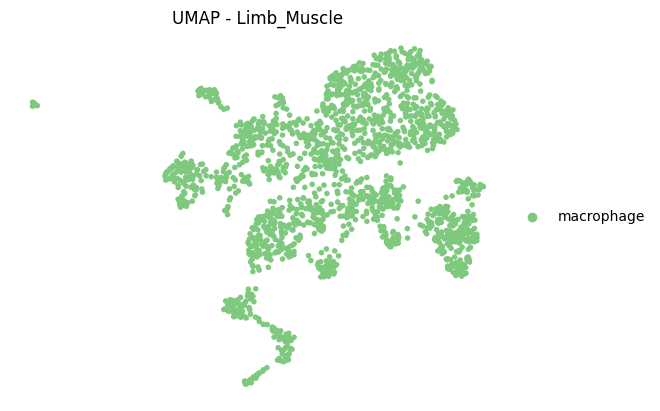

<Figure size 1000x600 with 0 Axes>

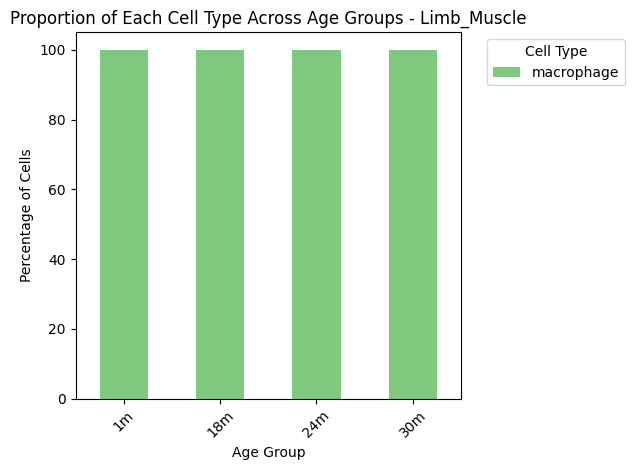

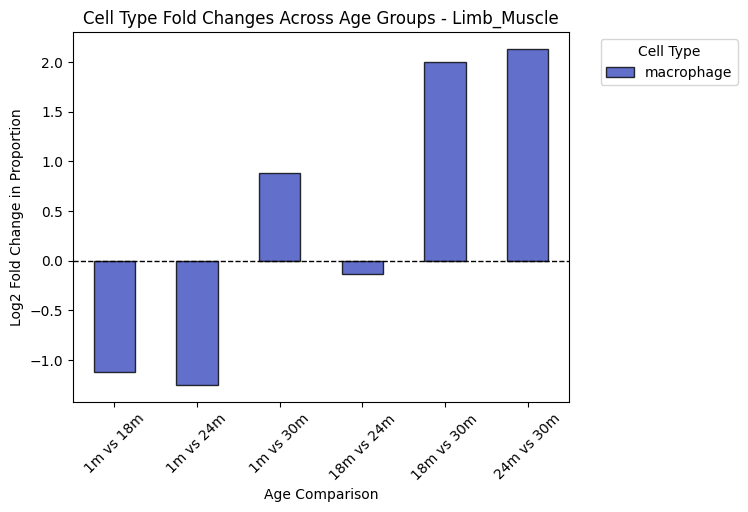

Analysis completed for Limb_Muscle. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures

Processing Mammary_Gland...
Skipping Mammary_Gland as no selected cell types are present.

Processing Spleen...


/tmp/ipykernel_6868/549117026.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

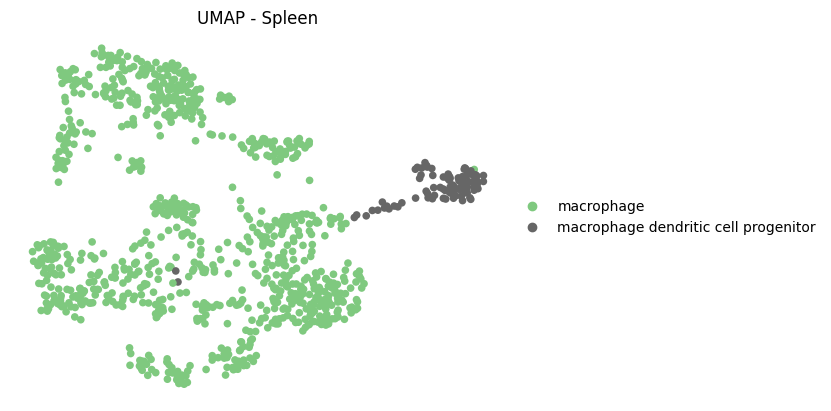

<Figure size 1000x600 with 0 Axes>

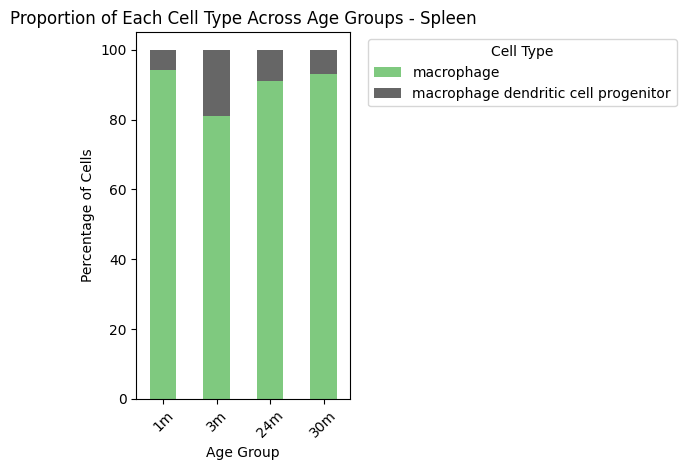

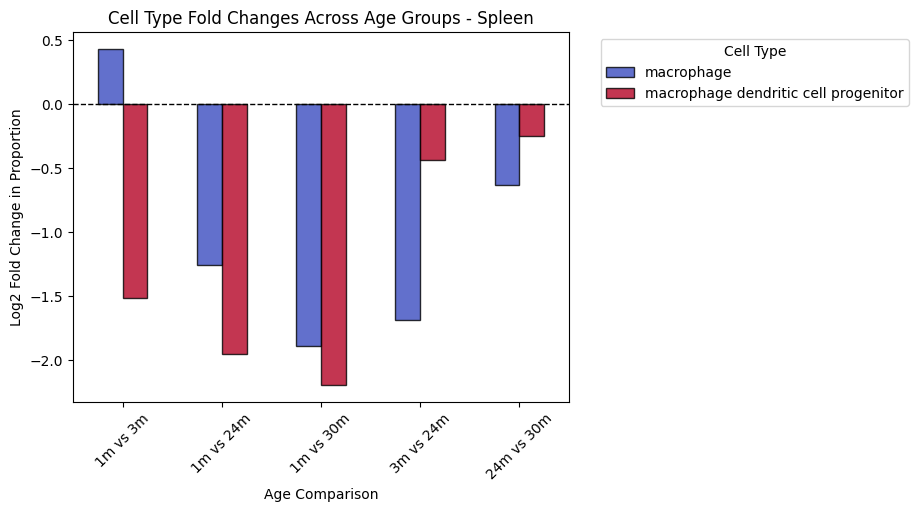

Analysis completed for Spleen. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures

Processing Heart_and_Aorta...
Skipping Heart_and_Aorta as no selected cell types are present.

Processing Bladder...
Skipping Bladder as no selected cell types are present.

Processing Pancreas...
Skipping Pancreas as no selected cell types are present.

Processing Fat...
Skipping Fat as no selected cell types are present.

Processing Lung...


/tmp/ipykernel_6868/549117026.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

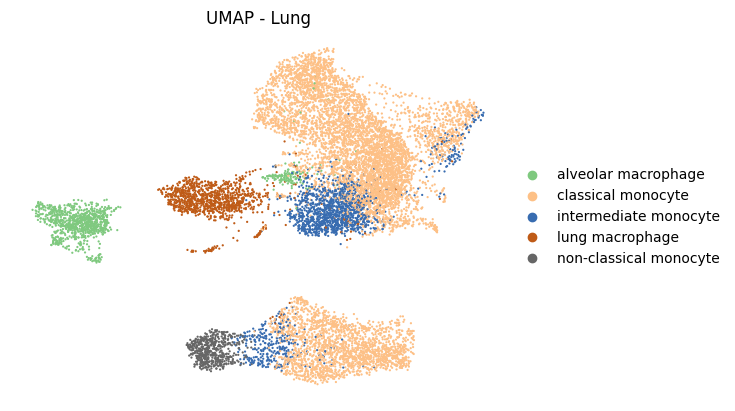

<Figure size 1000x600 with 0 Axes>

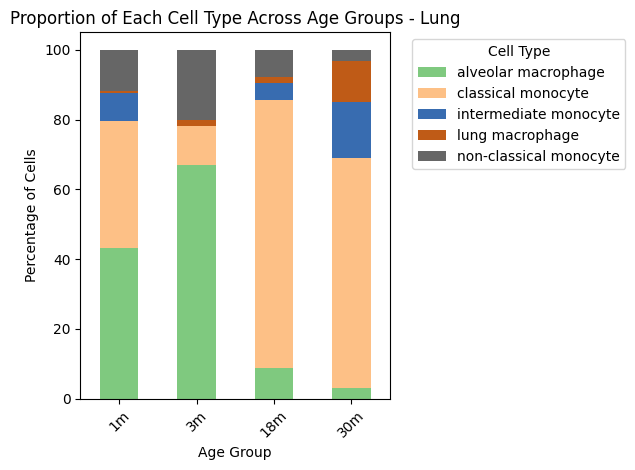

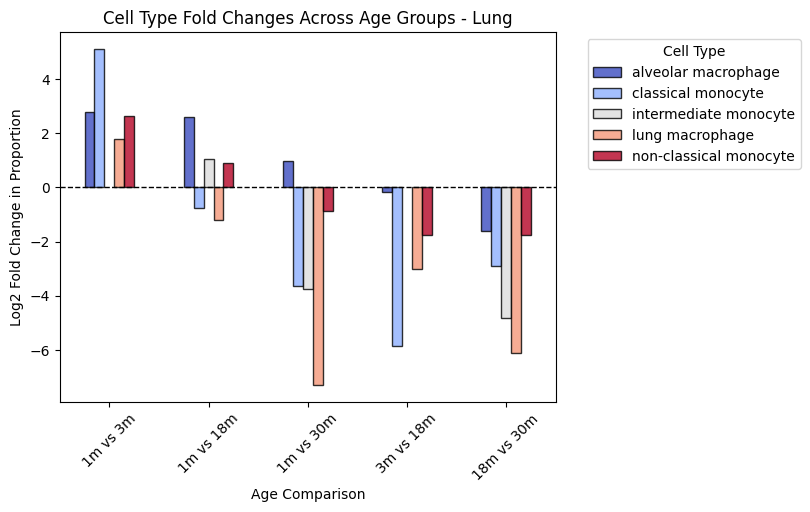

Analysis completed for Lung. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures

Processing Kidney...


/tmp/ipykernel_6868/549117026.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

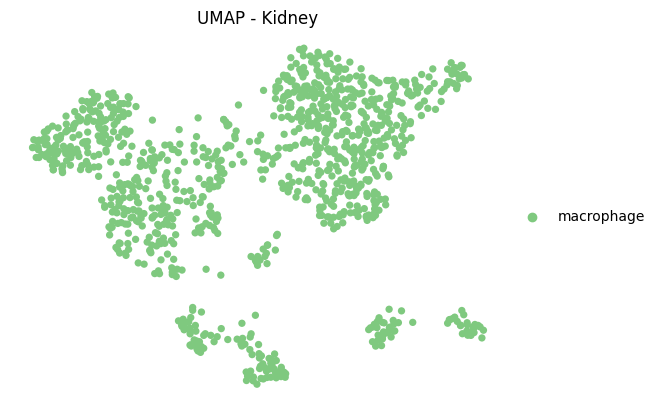

<Figure size 1000x600 with 0 Axes>

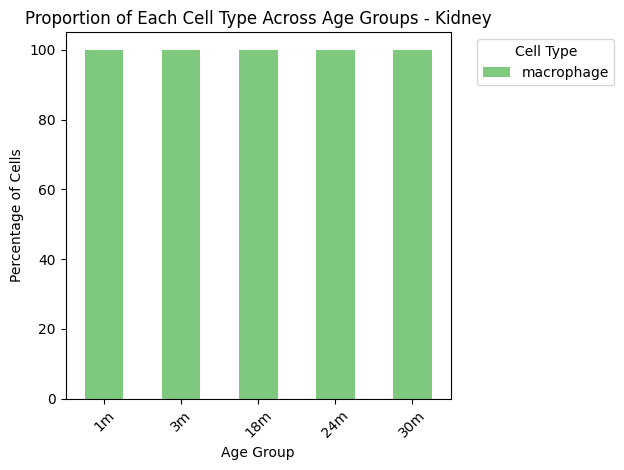

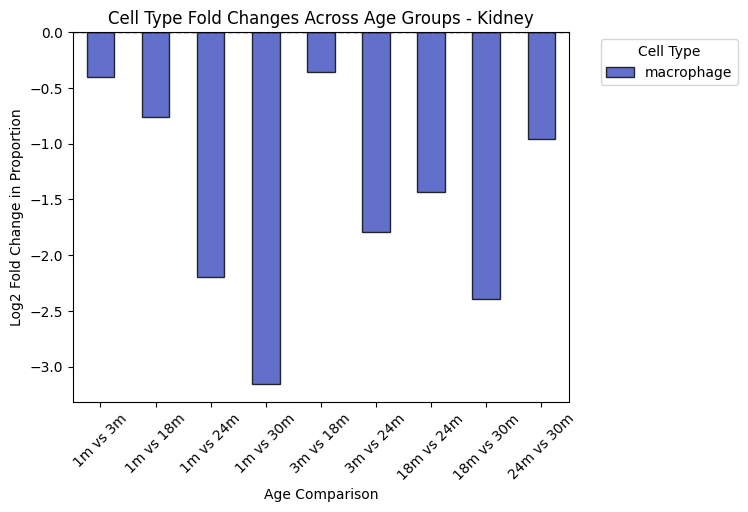

Analysis completed for Kidney. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures

Processing Tongue...
Skipping Tongue as no selected cell types are present.

Processing Skin...
Skipping Skin as no selected cell types are present.

Processing Thymus...
Skipping Thymus as no selected cell types are present.



<Figure size 640x480 with 0 Axes>

In [11]:
import os
import scanpy as sc
import pandas as pd
import scipy.io
import gzip
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import scipy.stats as stats

# Define folder path containing .h5ad files
h5ad_folder = "/mnt/data/melhajjar/tabula_muris/all_tissues/"  # Update this path as needed
save_dir = "/mnt/data/melhajjar/tabula_muris/all_tissues_figures"
os.makedirs(save_dir, exist_ok=True)

# Define selected cell types
selected_cell_types = [
    "macrophage", "alveolar macrophage", "Kupffer cell", "lung macrophage",
    "macrophage dendritic cell progenitor", "monocyte", "classical monocyte",
    "non-classical monocyte", "intermediate monocyte", "promonocyte"
]

# Process each .h5ad file in the folder
for filename in os.listdir(h5ad_folder):
    if filename.endswith(".h5ad"):
        tissue_name = filename.replace(".h5ad", "")  # Extract tissue name
        print(f"Processing {tissue_name}...")
        
        # Load dataset
        file_path = os.path.join(h5ad_folder, filename)
        adata = sc.read_h5ad(file_path)
        
        # Ensure all sparse matrices are in CSR format
        adata.X = adata.X.tocsr()
        if hasattr(adata, "raw") and adata.raw is not None:
            adata.raw.X = adata.raw.X.tocsr()
        
        # Filter cells and genes
        sc.pp.filter_cells(adata, min_genes=100)
        sc.pp.filter_genes(adata, min_cells=3)
        
        # Remove female subjects
        adata = adata[adata.obs['sex'] != "female"]
        
        # Filter selected cell types
        adata_selected = adata[adata.obs['cell_ontology_class'].isin(selected_cell_types)].copy()
        
        # Skip if there are no selected cell types
        if adata_selected.n_obs == 0:
            print(f"Skipping {tissue_name} as no selected cell types are present.\n")
            continue
        
        # Normalize and preprocess
        sc.pp.normalize_total(adata_selected, target_sum=1e4)
        sc.pp.log1p(adata_selected)
        sc.pp.highly_variable_genes(adata_selected, n_top_genes=2000, batch_key="age")
        sc.pp.scale(adata_selected, max_value=10)
        sc.tl.pca(adata_selected)
        sc.pp.neighbors(adata_selected, n_pcs=50)
        sc.tl.umap(adata_selected)
        
        # Display and save UMAP plot
        plt.figure()
        sc.pl.umap(
            adata_selected,
            show=False,
            palette='Accent',
            color="cell_ontology_class",
            title=f"UMAP - {tissue_name}",
            frameon=False,
        )
        plt.savefig(os.path.join(save_dir, f"UMAP_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        # Compute cell type proportions
        cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)
        cell_type_percentages = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0) * 100
        
        # Display and save proportion bar plot
        plt.figure(figsize=(10, 6))
        cell_type_percentages.plot(kind='bar', stacked=True, colormap='Accent')
        plt.ylabel("Percentage of Cells")
        plt.xlabel("Age Group")
        plt.title(f"Proportion of Each Cell Type Across Age Groups - {tissue_name}")
        plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        plt.savefig(os.path.join(save_dir, f"Cell_Type_Proportions_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        # Log2 Fold Change Analysis
        if not cell_type_counts.empty:
            comparisons = [("1m", "3m"), 
                           ("1m", "18m"),
                            ("1m", "24m"), 
                           ("1m", "30m"), 
                           ("3m", "18m"), 
                            ("3m", "24m"),
                            ("18m", "24m"),
                            ("18m", "30m"),
                           ("24m", "30m")]
            fold_change_dict = {f"{newer} vs {older}": np.log2(cell_type_counts.loc[newer] / cell_type_counts.loc[older]) for newer, older in comparisons if newer in cell_type_counts.index and older in cell_type_counts.index}
            fold_change_df = pd.DataFrame(fold_change_dict).T
            if not fold_change_df.empty:
                fold_change_df.plot(kind="bar", cmap="coolwarm", edgecolor="black", alpha=0.8)
                plt.axhline(0, color="black", linestyle="--", linewidth=1)
                plt.ylabel("Log2 Fold Change in Proportion")
                plt.xlabel("Age Comparison")
                plt.title(f"Cell Type Fold Changes Across Age Groups - {tissue_name}")
                plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left")
                plt.xticks(rotation=45)
                plt.show()
                plt.savefig(os.path.join(save_dir, f"Cell_Type_LogFoldChange_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        print(f"Analysis completed for {tissue_name}. Results saved in {save_dir}\n")



Processing Liver...


/tmp/ipykernel_12958/1628125036.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Liver. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test

Processing Marrow...


/tmp/ipykernel_12958/1628125036.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Marrow. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test

Processing Trachea...


/tmp/ipykernel_12958/1628125036.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Trachea. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test

Processing Large_Intestine...
Skipping Large_Intestine as no selected cell types are present.

Processing Limb_Muscle...


/tmp/ipykernel_12958/1628125036.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Limb_Muscle. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test

Processing Mammary_Gland...
Skipping Mammary_Gland as no selected cell types are present.

Processing Spleen...


/tmp/ipykernel_12958/1628125036.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
/tmp/ipykernel_12958/1628125036.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Spleen. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test

Processing Heart_and_Aorta...
Skipping Heart_and_Aorta as no selected cell types are present.

Processing Bladder...
Skipping Bladder as no selected cell types are present.

Processing Pancreas...
Skipping Pancreas as no selected cell types are present.

Processing Fat...
Skipping Fat as no selected cell types are present.

Processing Lung...


/tmp/ipykernel_12958/1628125036.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


Analysis completed for Lung. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test

Processing Kidney...


/tmp/ipykernel_12958/1628125036.py:76: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Kidney. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test

Processing Tongue...
Skipping Tongue as no selected cell types are present.

Processing Skin...
Skipping Skin as no selected cell types are present.

Processing Thymus...
Skipping Thymus as no selected cell types are present.



<Figure size 640x480 with 0 Axes>

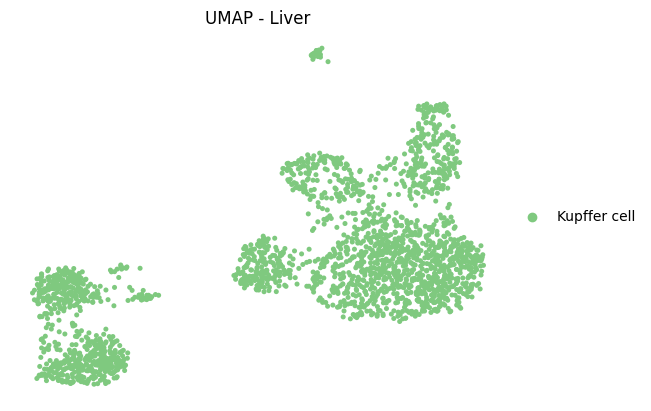

<Figure size 1000x600 with 0 Axes>

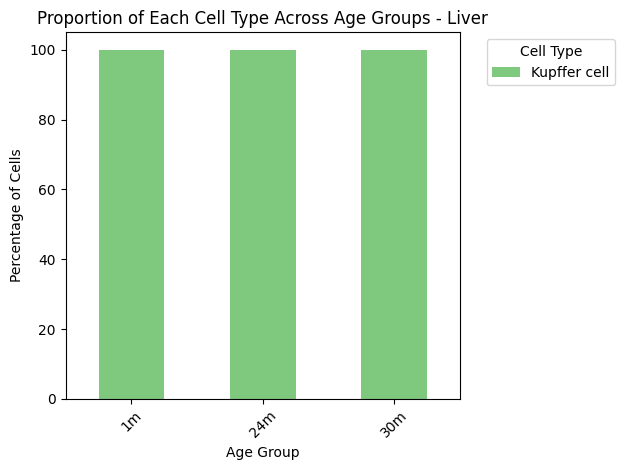

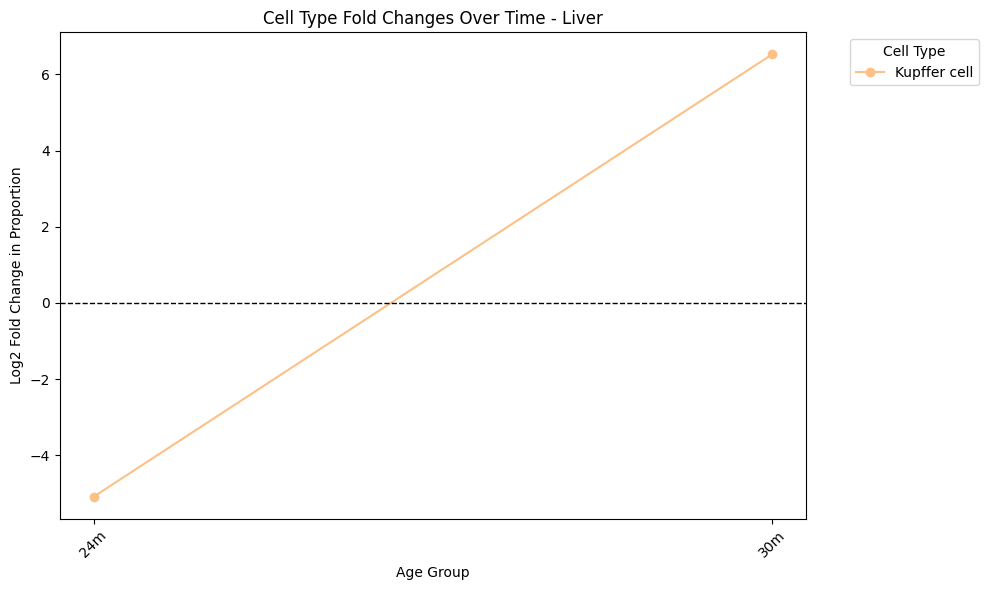

<Figure size 640x480 with 0 Axes>

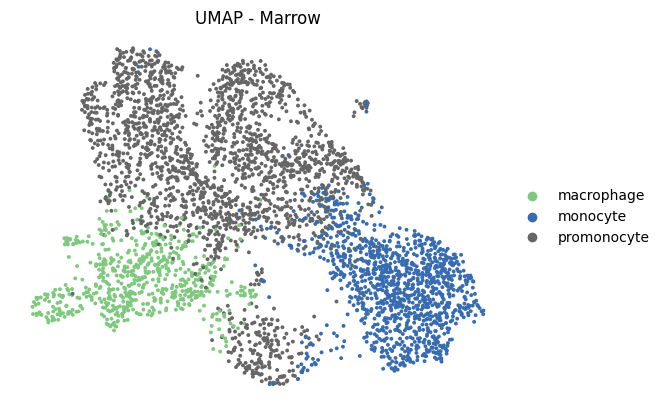

<Figure size 1000x600 with 0 Axes>

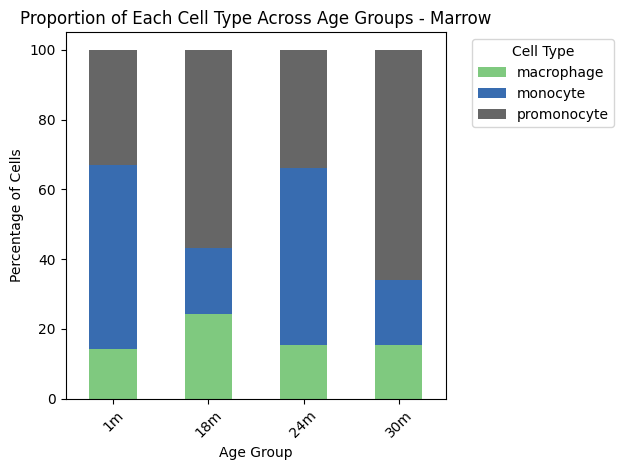

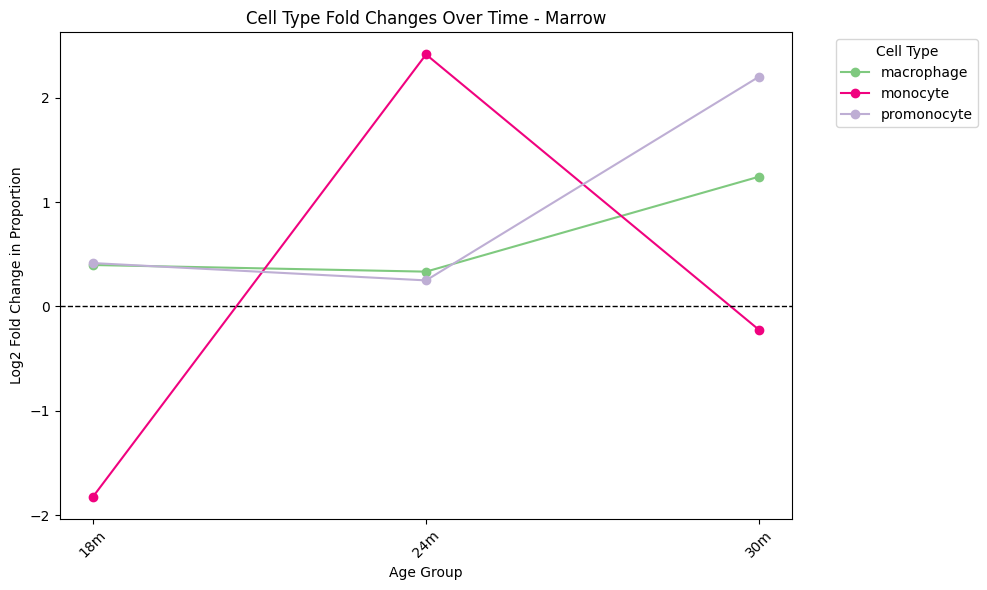

<Figure size 640x480 with 0 Axes>

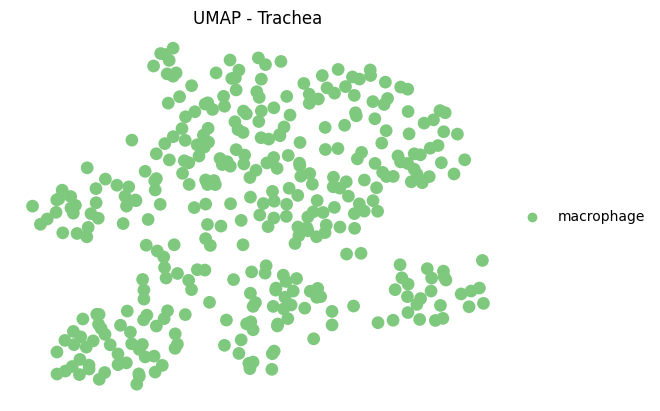

<Figure size 1000x600 with 0 Axes>

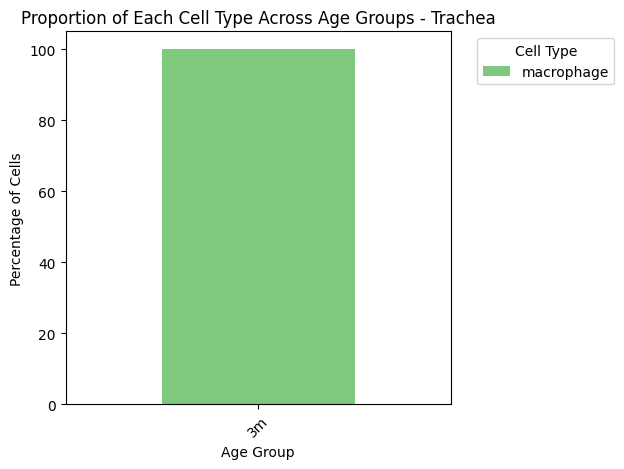

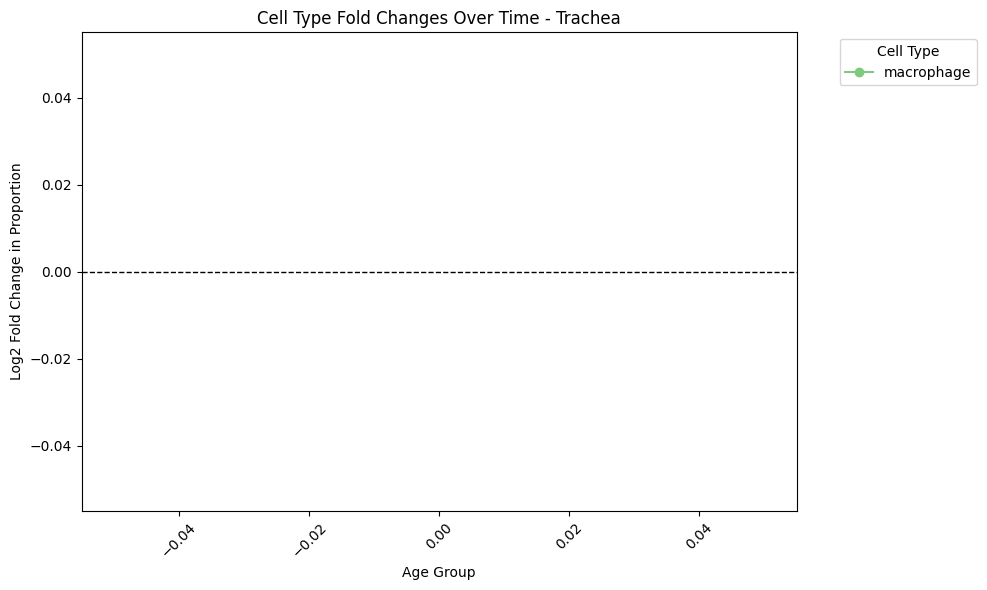

<Figure size 640x480 with 0 Axes>

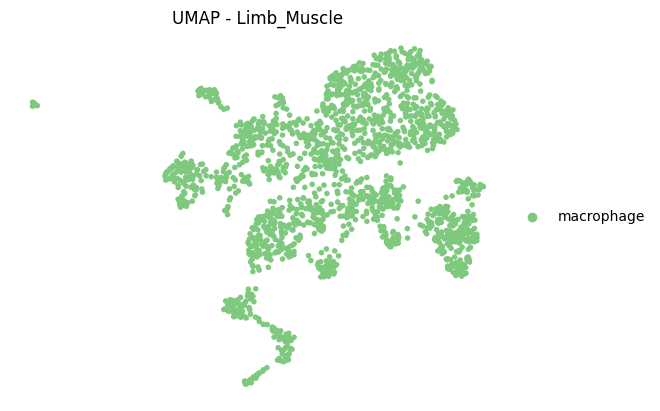

<Figure size 1000x600 with 0 Axes>

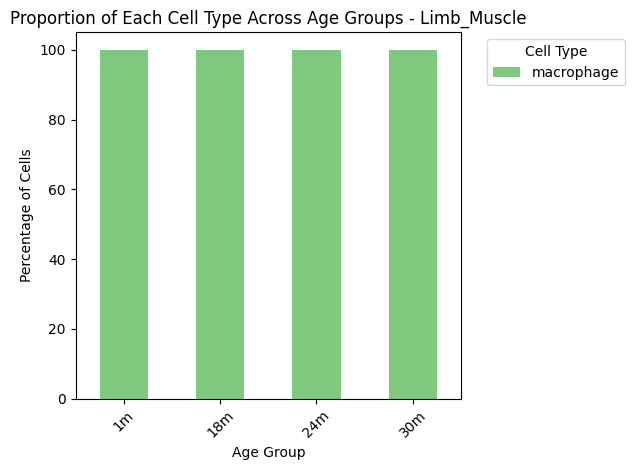

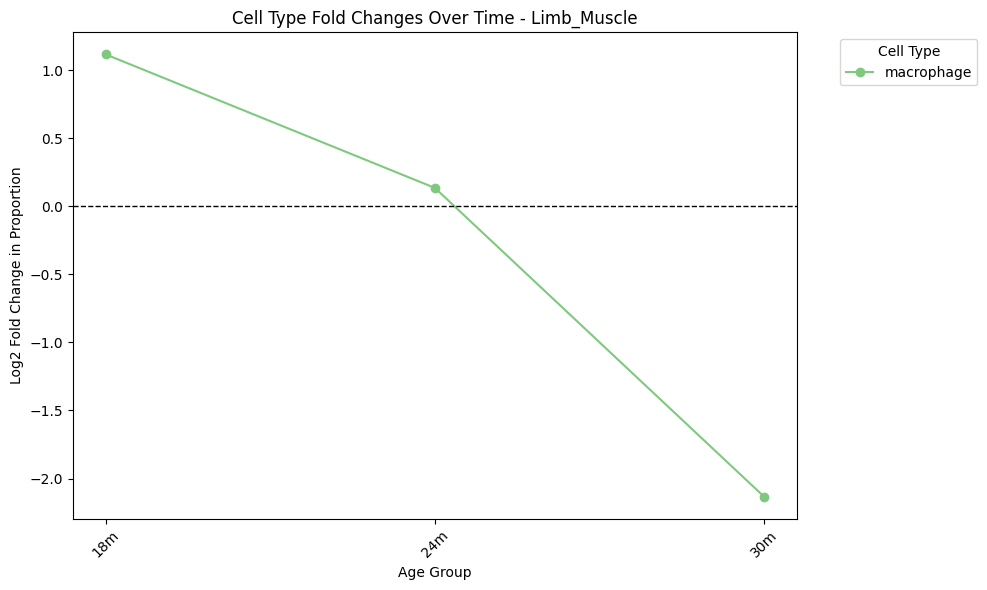

<Figure size 640x480 with 0 Axes>

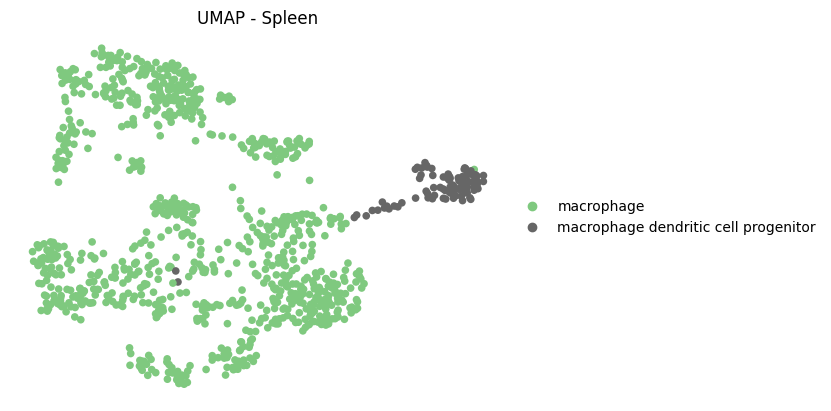

<Figure size 1000x600 with 0 Axes>

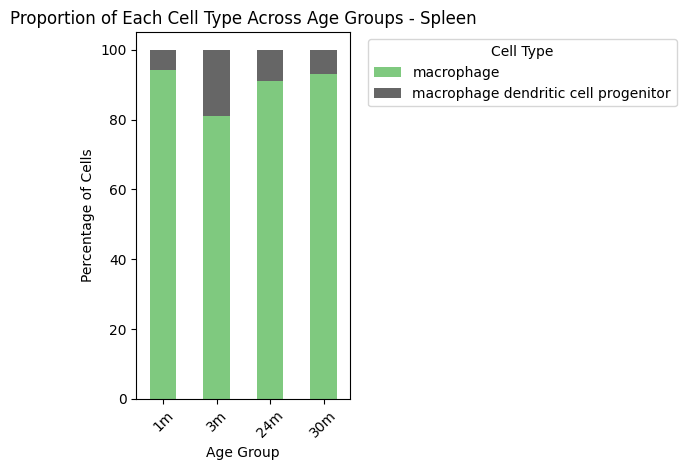

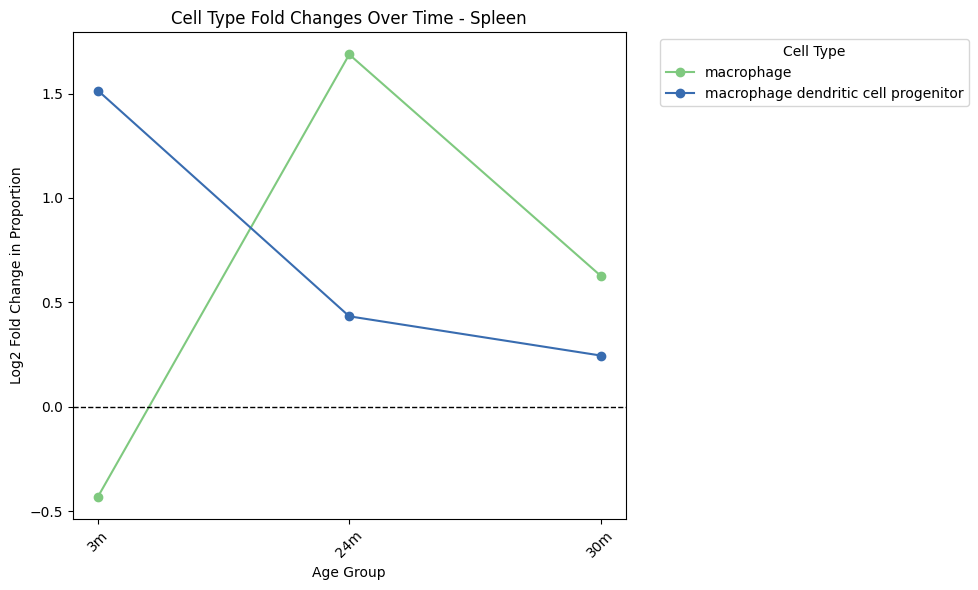

<Figure size 640x480 with 0 Axes>

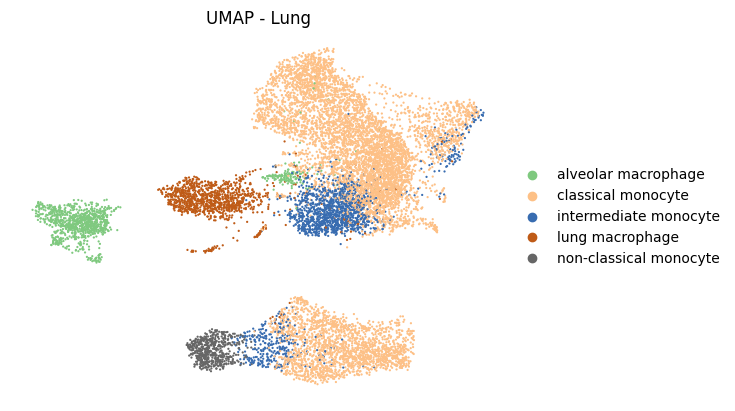

<Figure size 1000x600 with 0 Axes>

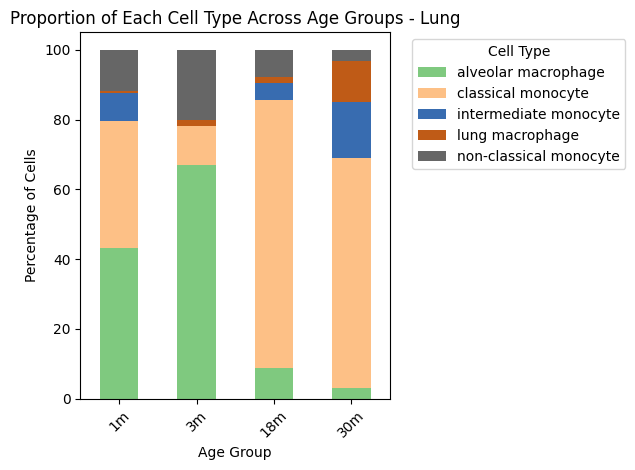

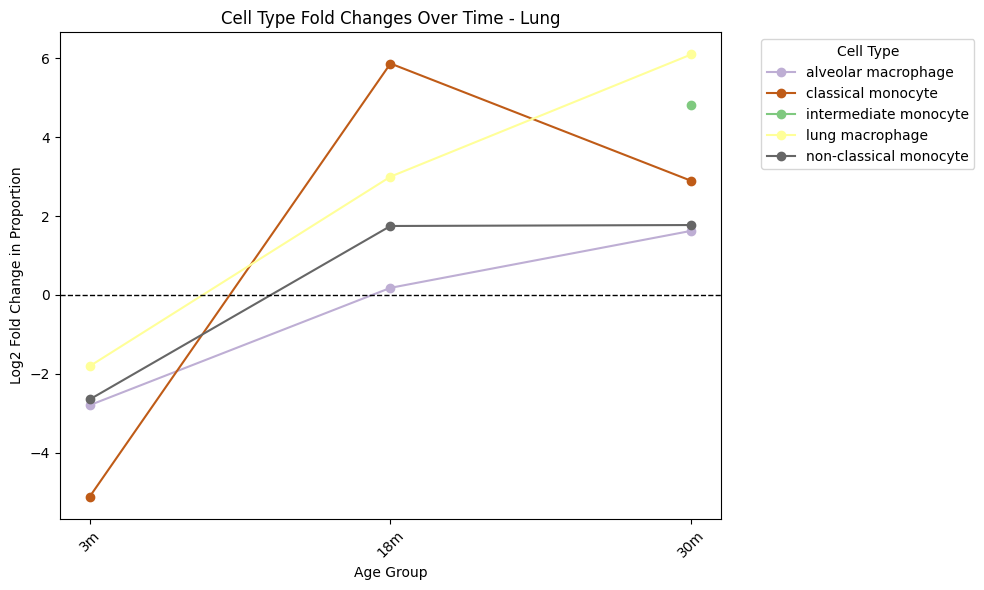

<Figure size 640x480 with 0 Axes>

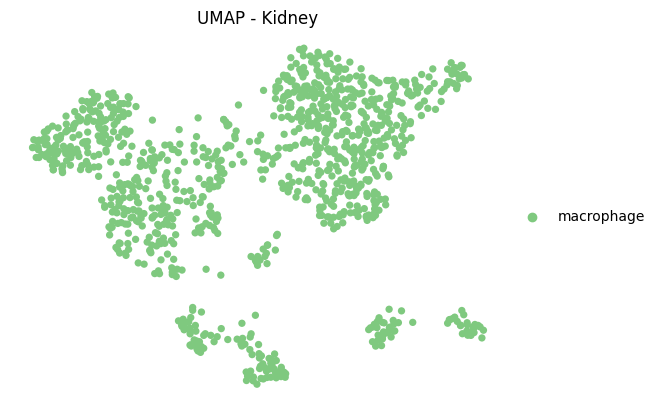

<Figure size 1000x600 with 0 Axes>

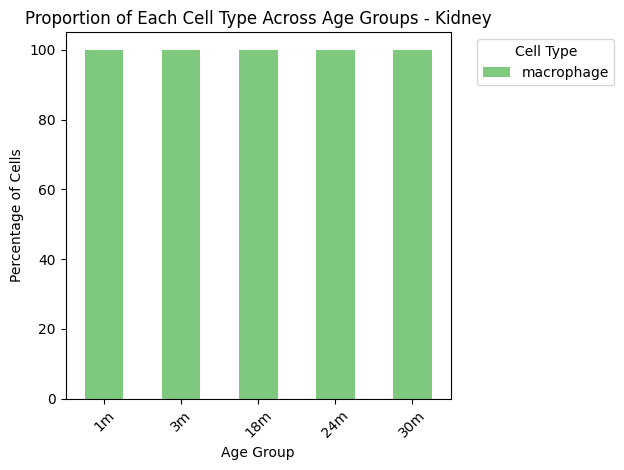

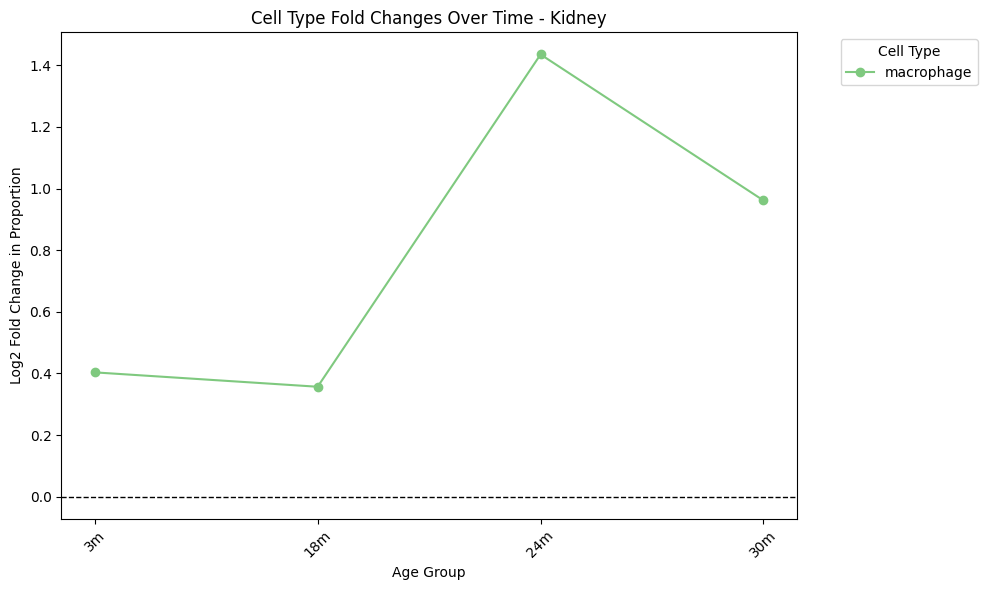

In [7]:
import os
import scanpy as sc
import pandas as pd
import scipy.io
import gzip
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import scipy.stats as stats

# Define folder path containing .h5ad files
h5ad_folder = "/mnt/data/melhajjar/tabula_muris/all_tissues/"  # Update this path as needed
save_dir = "/mnt/data/melhajjar/tabula_muris/all_tissues_figures_test"
os.makedirs(save_dir, exist_ok=True)

# Define selected cell types
selected_cell_types = [
    "macrophage", "alveolar macrophage", "Kupffer cell", "lung macrophage",
    "macrophage dendritic cell progenitor", "monocyte", "classical monocyte",
    "non-classical monocyte", "intermediate monocyte", "promonocyte"
]

# Process each .h5ad file in the folder
for filename in os.listdir(h5ad_folder):
    if filename.endswith(".h5ad"):
        tissue_name = filename.replace(".h5ad", "")  # Extract tissue name
        print(f"Processing {tissue_name}...")
        
        # Load dataset
        file_path = os.path.join(h5ad_folder, filename)
        adata = sc.read_h5ad(file_path)
        
        # Ensure all sparse matrices are in CSR format
        adata.X = adata.X.tocsr()
        if hasattr(adata, "raw") and adata.raw is not None:
            adata.raw.X = adata.raw.X.tocsr()
        
        # Filter cells and genes
        sc.pp.filter_cells(adata, min_genes=100)
        sc.pp.filter_genes(adata, min_cells=3)
        
        # Remove female subjects
        adata = adata[adata.obs['sex'] != "female"]
        
        # Filter selected cell types
        adata_selected = adata[adata.obs['cell_ontology_class'].isin(selected_cell_types)].copy()
        
        # Skip if there are no selected cell types
        if adata_selected.n_obs == 0:
            print(f"Skipping {tissue_name} as no selected cell types are present.\n")
            continue
        
        # Normalize and preprocess
        sc.pp.normalize_total(adata_selected, target_sum=1e4)
        sc.pp.log1p(adata_selected)
        sc.pp.highly_variable_genes(adata_selected, n_top_genes=2000, batch_key="age")
        sc.pp.scale(adata_selected, max_value=10)
        sc.tl.pca(adata_selected)
        sc.pp.neighbors(adata_selected, n_pcs=50)
        sc.tl.umap(adata_selected)
        
        # Save UMAP plot
        plt.figure()
        sc.pl.umap(
            adata_selected,
            palette='Accent',
            show=False,
            color="cell_ontology_class",
            title=f"UMAP - {tissue_name}",
            frameon=False
        )
        plt.savefig(os.path.join(save_dir, f"UMAP_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        # Compute cell type proportions
        cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)
        cell_type_percentages = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0) * 100
        
        # Save proportion bar plot
        plt.figure(figsize=(10, 6))
        cell_type_percentages.plot(kind='bar', stacked=True, colormap='Accent')
        plt.ylabel("Percentage of Cells")
        plt.xlabel("Age Group")
        plt.title(f"Proportion of Each Cell Type Across Age Groups - {tissue_name}")
        plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"Cell_Type_Proportions_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        # Log2 Fold Change Analysis with linear trend
        if not cell_type_counts.empty:
            fold_change_df = np.log2(cell_type_counts.div(cell_type_counts.shift(1)))
            fold_change_df = fold_change_df.dropna()
            
            plt.figure(figsize=(10, 6))
            umap_palette = sns.color_palette('Accent', n_colors=len(selected_cell_types))
            color_dict = dict(zip(selected_cell_types, umap_palette))
            colors = [color_dict.get(cell_type, 'black') for cell_type in fold_change_df.columns]
            for cell_type, color in zip(fold_change_df.columns, colors):
                plt.plot(fold_change_df.index, fold_change_df[cell_type], marker='o', linestyle='-', label=cell_type, color=color)
            
            plt.axhline(0, color="black", linestyle="--", linewidth=1)
            plt.ylabel("Log2 Fold Change in Proportion")
            plt.xlabel("Age Group")
            plt.title(f"Cell Type Fold Changes Over Time - {tissue_name}")
            plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(os.path.join(save_dir, f"Cell_Type_LogFoldChange_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        print(f"Analysis completed for {tissue_name}. Results saved in {save_dir}\n")



Processing Liver...


/tmp/ipykernel_25917/2741020191.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Liver. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test2

Processing Marrow...


/tmp/ipykernel_25917/2741020191.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Marrow. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test2

Processing Trachea...


/tmp/ipykernel_25917/2741020191.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Trachea. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test2

Processing Large_Intestine...
Skipping Large_Intestine as no selected cell types are present.

Processing Limb_Muscle...


/tmp/ipykernel_25917/2741020191.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Limb_Muscle. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test2

Processing Mammary_Gland...
Skipping Mammary_Gland as no selected cell types are present.

Processing Spleen...


/tmp/ipykernel_25917/2741020191.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
/tmp/ipykernel_25917/2741020191.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Spleen. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test2

Processing Heart_and_Aorta...
Skipping Heart_and_Aorta as no selected cell types are present.

Processing Bladder...
Skipping Bladder as no selected cell types are present.

Processing Pancreas...
Skipping Pancreas as no selected cell types are present.

Processing Fat...
Skipping Fat as no selected cell types are present.

Processing Lung...


/tmp/ipykernel_25917/2741020191.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)
/bioinformatics/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


Analysis completed for Lung. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test2

Processing Kidney...


/tmp/ipykernel_25917/2741020191.py:85: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)


Analysis completed for Kidney. Results saved in /mnt/data/melhajjar/tabula_muris/all_tissues_figures_test2

Processing Tongue...
Skipping Tongue as no selected cell types are present.

Processing Skin...
Skipping Skin as no selected cell types are present.

Processing Thymus...
Skipping Thymus as no selected cell types are present.



<Figure size 640x480 with 0 Axes>

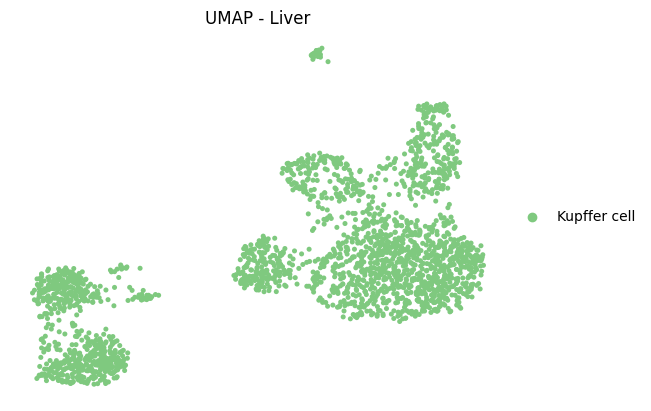

<Figure size 1000x600 with 0 Axes>

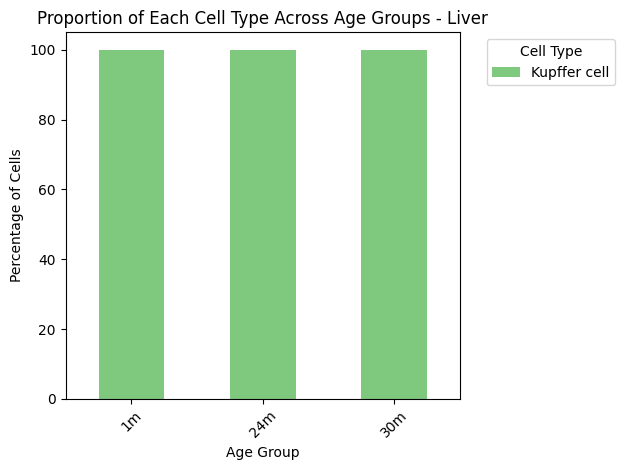

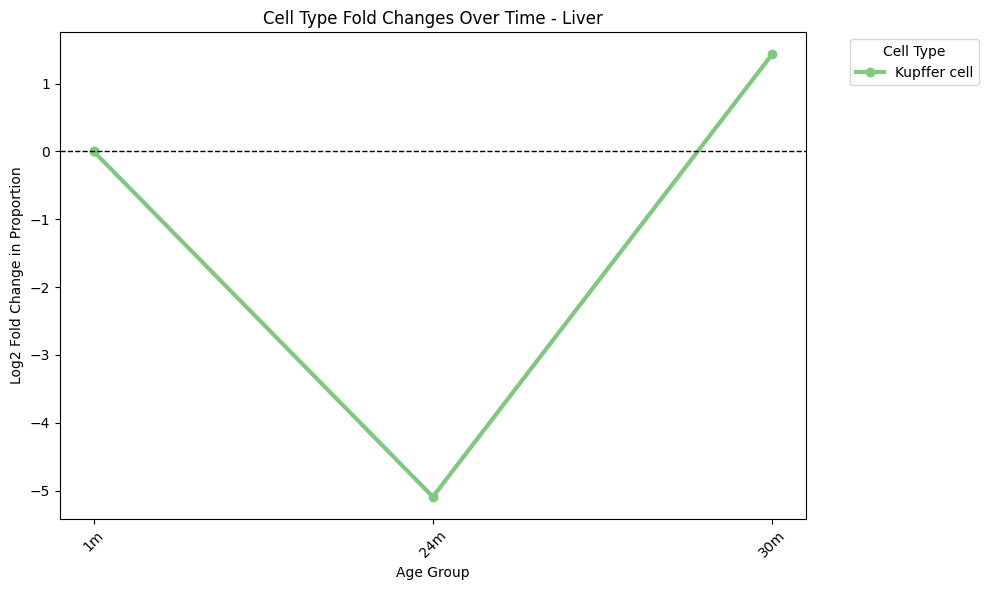

<Figure size 640x480 with 0 Axes>

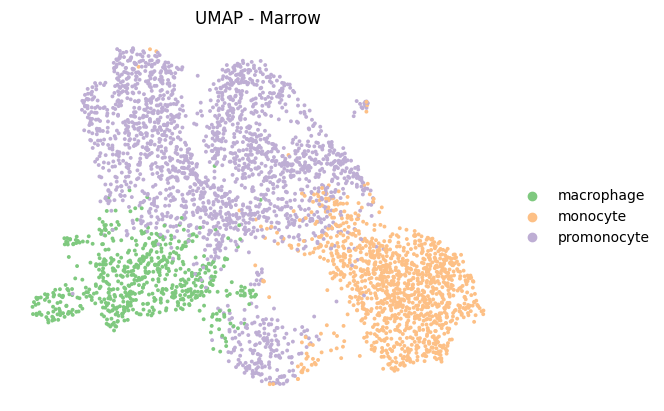

<Figure size 1000x600 with 0 Axes>

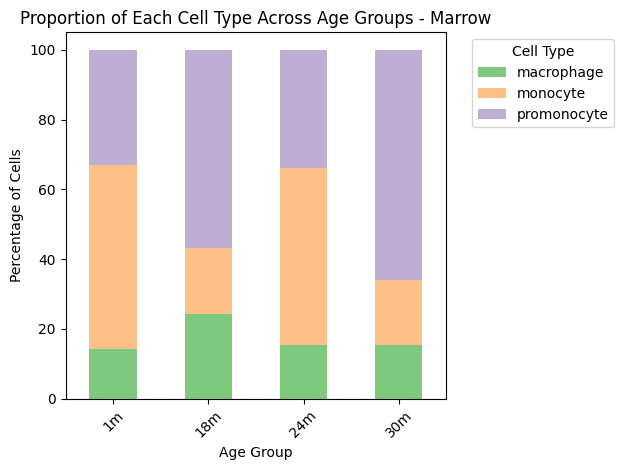

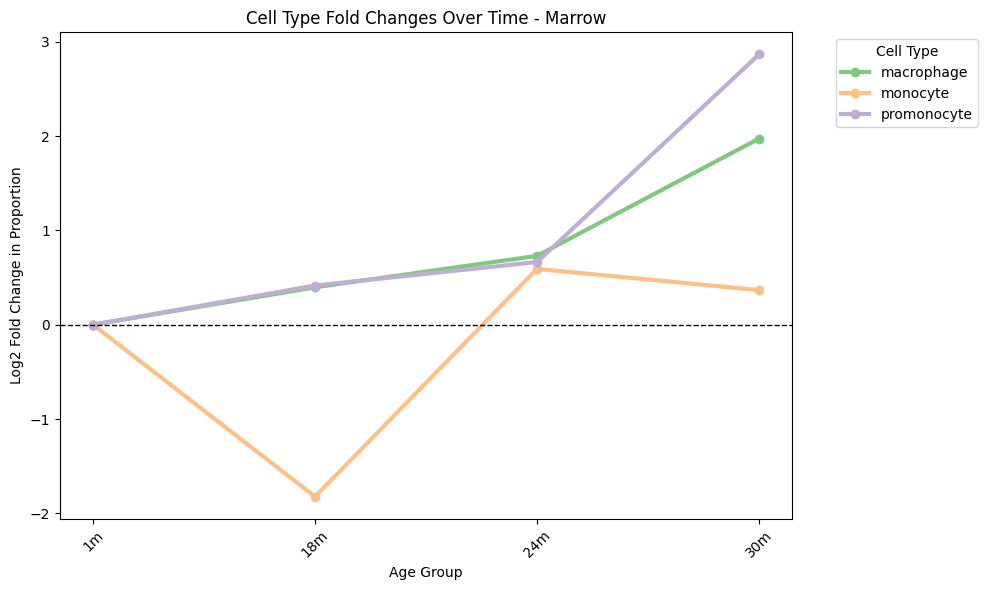

<Figure size 640x480 with 0 Axes>

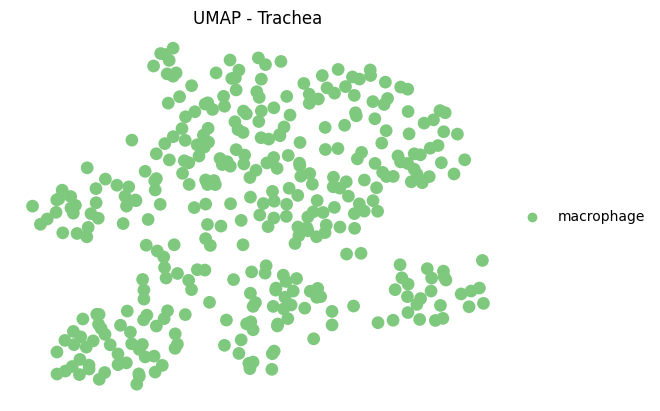

<Figure size 1000x600 with 0 Axes>

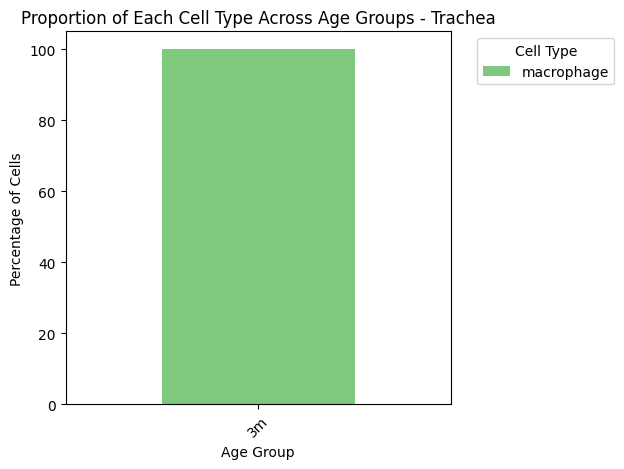

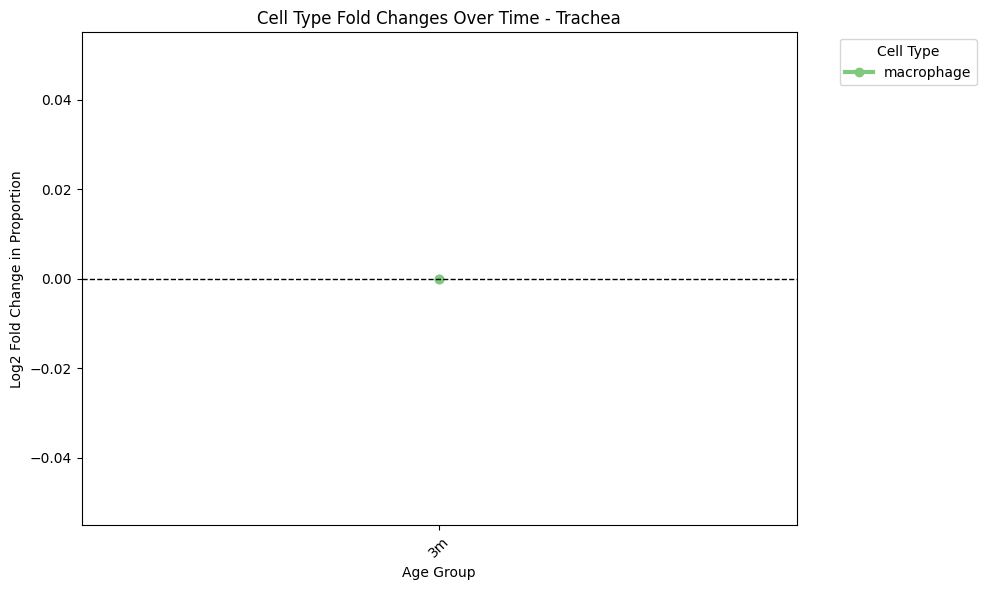

<Figure size 640x480 with 0 Axes>

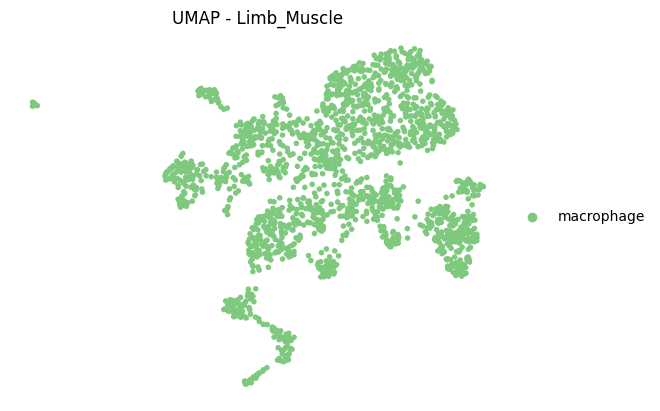

<Figure size 1000x600 with 0 Axes>

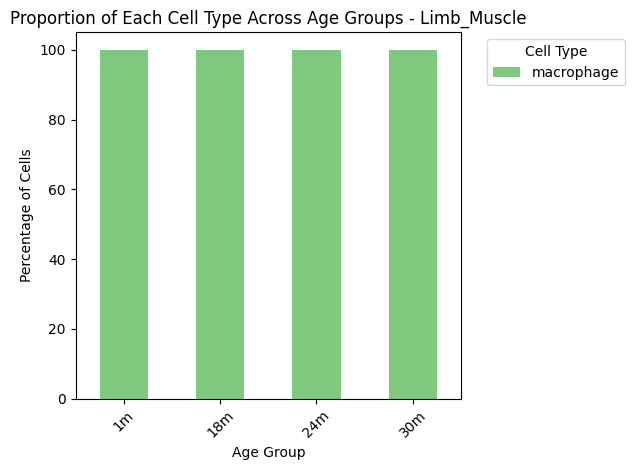

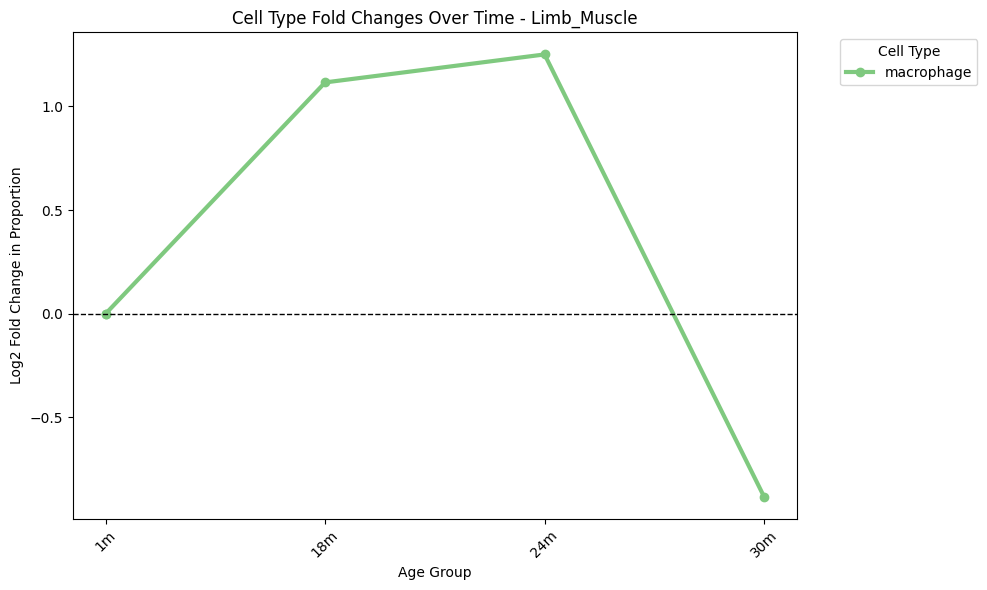

<Figure size 640x480 with 0 Axes>

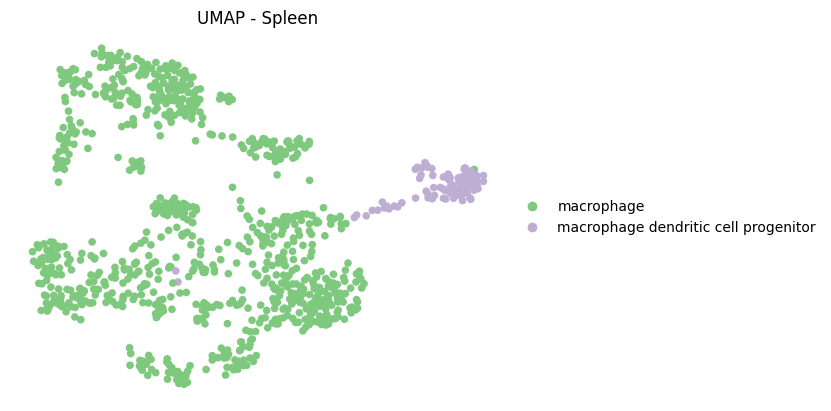

<Figure size 1000x600 with 0 Axes>

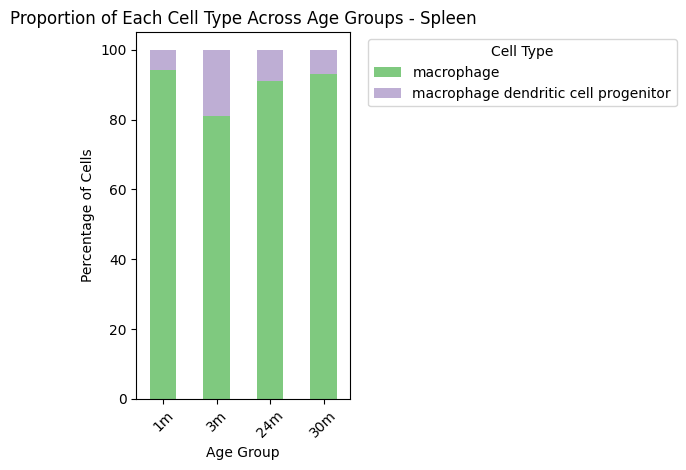

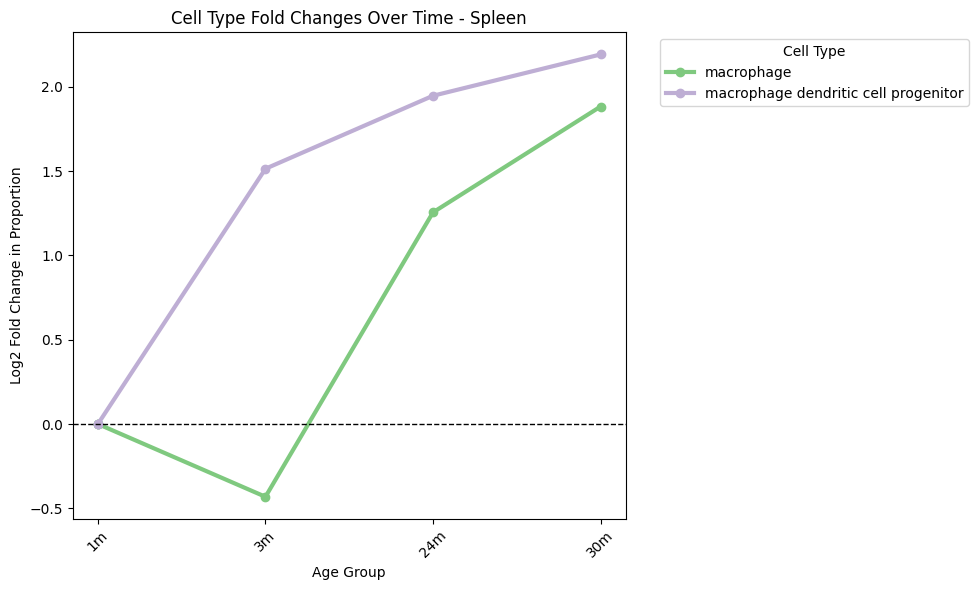

<Figure size 640x480 with 0 Axes>

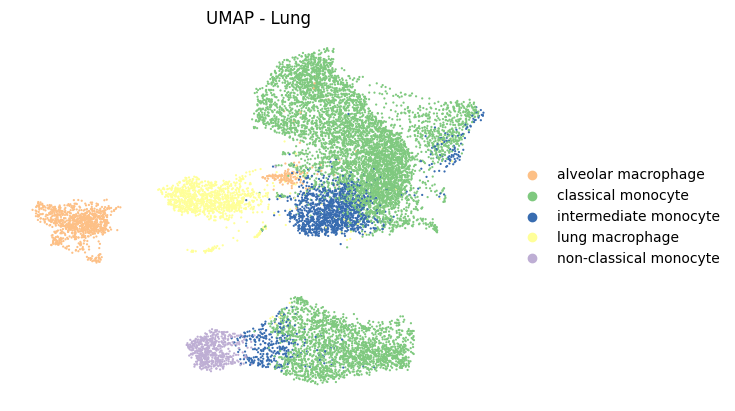

<Figure size 1000x600 with 0 Axes>

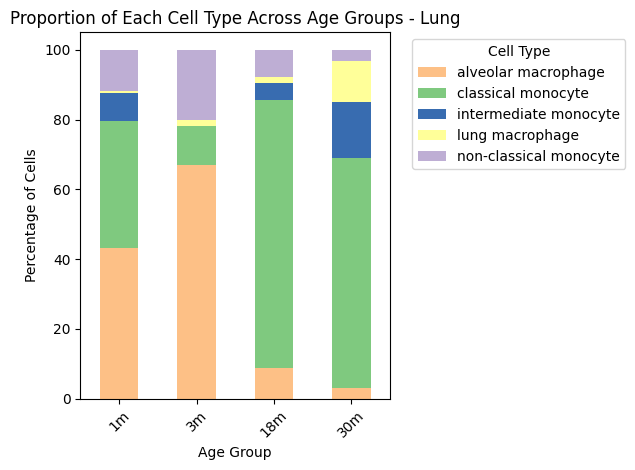

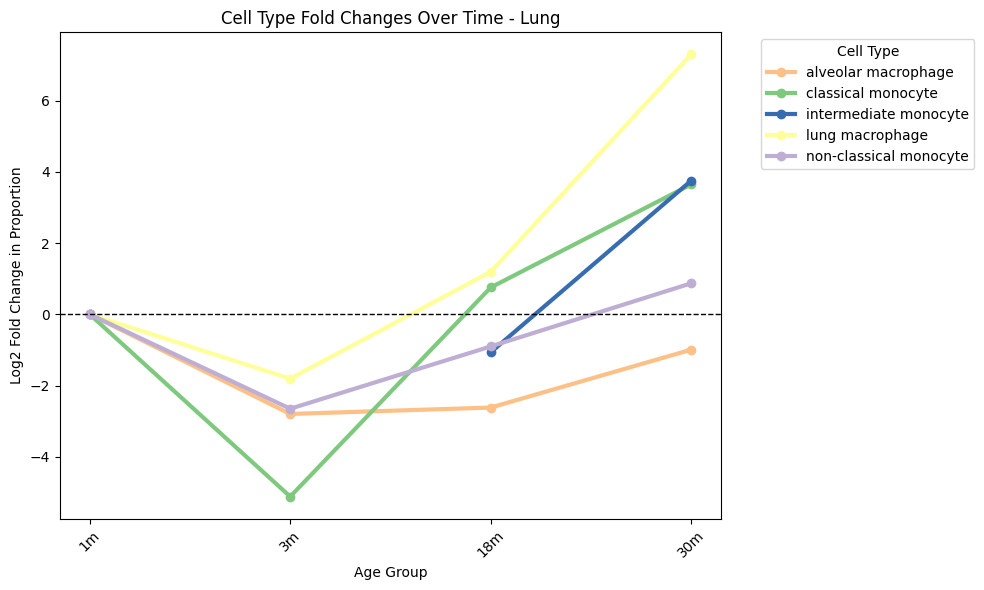

<Figure size 640x480 with 0 Axes>

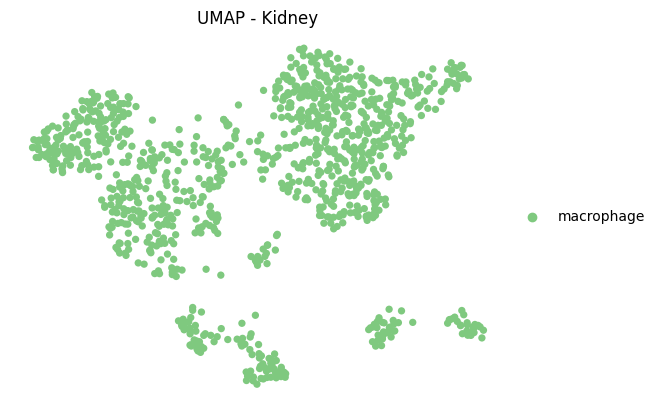

<Figure size 1000x600 with 0 Axes>

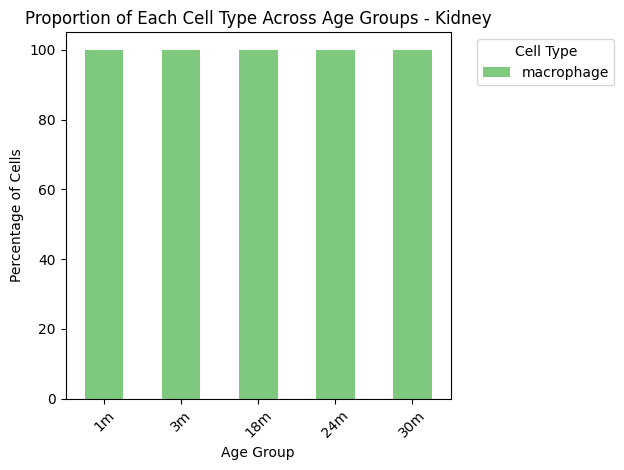

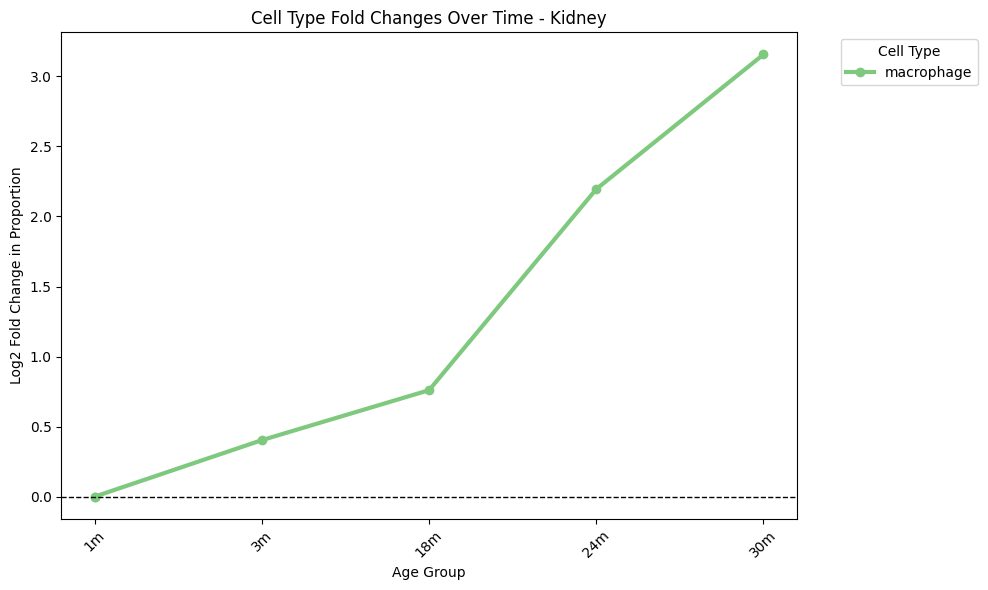

In [ ]:
import os
import scanpy as sc
import pandas as pd
import scipy.io
import gzip
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import scipy.stats as stats

# Define folder path containing .h5ad files
h5ad_folder = "/mnt/data/melhajjar/tabula_muris/all_tissues/"  # Update this path as needed
save_dir = "/mnt/data/melhajjar/tabula_muris/all_tissues_figures_test2"
os.makedirs(save_dir, exist_ok=True)

# Define selected cell types
selected_cell_types = [
    "macrophage", "alveolar macrophage", "Kupffer cell", "lung macrophage",
    "macrophage dendritic cell progenitor", "monocyte", "classical monocyte",
    "non-classical monocyte", "intermediate monocyte", "promonocyte"
]

# Process each .h5ad file in the folder
for filename in os.listdir(h5ad_folder):
    if filename.endswith(".h5ad"):
        tissue_name = filename.replace(".h5ad", "")  # Extract tissue name
        print(f"Processing {tissue_name}...")
        
        # Load dataset
        file_path = os.path.join(h5ad_folder, filename)
        adata = sc.read_h5ad(file_path)
        
        # Ensure all sparse matrices are in CSR format
        adata.X = adata.X.tocsr()
        if hasattr(adata, "raw") and adata.raw is not None:
            adata.raw.X = adata.raw.X.tocsr()
        
        # Filter cells and genes
        sc.pp.filter_cells(adata, min_genes=100)
        sc.pp.filter_genes(adata, min_cells=3)
        
        # Remove female subjects
        adata = adata[adata.obs['sex'] != "female"]
        
        # Filter selected cell types
        adata_selected = adata[adata.obs['cell_ontology_class'].isin(selected_cell_types)].copy()
        
        # Skip if there are no selected cell types
        if adata_selected.n_obs == 0:
            print(f"Skipping {tissue_name} as no selected cell types are present.\n")
            continue
        
        # Normalize and preprocess
        sc.pp.normalize_total(adata_selected, target_sum=1e4)
        sc.pp.log1p(adata_selected)
        sc.pp.highly_variable_genes(adata_selected, n_top_genes=2000, batch_key="age")
        sc.pp.scale(adata_selected, max_value=10)
        sc.tl.pca(adata_selected)
        sc.pp.neighbors(adata_selected, n_pcs=50)
        sc.tl.umap(adata_selected)
        
        # Extract UMAP color mapping
        if 'cell_ontology_class_colors' in adata_selected.uns and len(adata_selected.uns['cell_ontology_class_colors']) == len(adata_selected.obs['cell_ontology_class'].cat.categories):
            color_dict = dict(zip(adata_selected.obs['cell_ontology_class'].cat.categories, adata_selected.uns['cell_ontology_class_colors']))
        else:
            unique_cell_types = adata_selected.obs['cell_ontology_class'].unique()
            color_palette = sns.color_palette('Accent', n_colors=len(unique_cell_types))
            color_dict = dict(zip(unique_cell_types, color_palette))
            # color_dict = dict(zip(adata_selected.obs['cell_ontology_class'].cat.categories, adata_selected.uns['cell_ontology_class_colors']))

        # Save UMAP plot
        plt.figure()
        sc.pl.umap(
            adata_selected,
            show=False,
            color="cell_ontology_class",
            title=f"UMAP - {tissue_name}",
            frameon=False,
            palette=[color_dict.get(cell, 'black') for cell in adata_selected.obs['cell_ontology_class'].cat.categories]
        )
        plt.savefig(os.path.join(save_dir, f"UMAP_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        # Compute cell type proportions
        cell_type_counts = adata_selected.obs.groupby(['age', 'cell_ontology_class']).size().unstack(fill_value=0)
        cell_type_percentages = cell_type_counts.div(cell_type_counts.sum(axis=1), axis=0) * 100
        
        # Save proportion bar plot
        plt.figure(figsize=(10, 6))
        cell_type_percentages.plot(kind='bar', stacked=True, color=[color_dict.get(cell, 'black') for cell in cell_type_percentages.columns])
        plt.ylabel("Percentage of Cells")
        plt.xlabel("Age Group")
        plt.title(f"Proportion of Each Cell Type Across Age Groups - {tissue_name}")
        plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"Cell_Type_Proportions_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        # Log2 Fold Change Analysis with linear trend
        if not cell_type_counts.empty:
            fold_change_df = np.log2(cell_type_counts.div(cell_type_counts.iloc[0]))
            fold_change_df = fold_change_df.dropna()
            
            plt.figure(figsize=(10, 6))
            for cell_type in fold_change_df.columns:
                # Ensure the first sample is connected properly
                first_value = cell_type_counts.iloc[0][cell_type] if cell_type in cell_type_counts.columns else np.nan
                baseline_values = [0] + fold_change_df[cell_type].tolist()
                time_points = [cell_type_counts.index[0]] + list(fold_change_df.index)
                plt.plot(time_points, baseline_values, marker='o', linestyle='-',  linewidth=2, label=cell_type, color=color_dict.get(cell_type, 'black'))
            
            plt.axhline(0, color="black", linestyle="--", linewidth=1)
            plt.ylabel("Log2 Fold Change in Proportion")
            plt.xlabel("Age Group")
            plt.title(f"Cell Type Fold Changes Over Time - {tissue_name}")
            plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(os.path.join(save_dir, f"Cell_Type_LogFoldChange_{tissue_name}.pdf"), format="pdf", bbox_inches="tight")
        
        print(f"Analysis completed for {tissue_name}. Results saved in {save_dir}\n")
